# **Evolution of NLP : A comprehensive Analysis in Sentiment Analysis From Naive Bayes to LLMs (Bert & GPT)**

---
> This study is on Natural Language processing specifically designed to learn the context, specifically known as sentiment analysis on IMDB movie review dataset.
The project aims to do a vast and advanced research on word representation and word tokenization starting from non-pretrained represention such as bag of words, TD-IDF to word2vec, Glove in Neural networks and in case of advanced LLMs such BERT which uses word piece tokenization Byte pair encoding in LLMs.Further it studies how efficient and gradually the model is
evolving to capture the semantics and context in the given vocabulary of reviews and this comparitive experiment is conducted on ML, DL and LLMs to observe the advancements and improved efficieny in capturing the context.Comparitive study is evident in qualtative and quatitative dimensions are evidently proven.





In [ ]:
import pandas as pd
import random

# Load the IMDb movie metadata dataset with Sentiment
movie = pd.read_csv('IMDB-MOVIE.csv')

# Load the IMDb review dataset with error handling for bad lines and quoting issues
try:
    review = pd.read_csv('IMDB-REVIEW.csv', on_bad_lines='skip', quotechar='"')
    print("IMDB-REVIEW dataset loaded successfully.")
except Exception as e:
    print(f"Error loading IMDB-REVIEW dataset: {e}")

# Check the columns in both datasets
print("IMDB-MOVIE Dataset Columns:", movie.columns)
print("IMDB-REVIEW Dataset Columns:", review.columns)

# Merge the datasets on the 'Sentiment' column
merged_data = pd.merge(movie,review, on='sentiment', how='inner')

# Display the merged data
print("\nMerged Dataset:")
print(merged_data.head())
print(merged_data)

# Save the merged dataset to a new CSV file
#merged_data.to_csv('IMDB-MOVIE-REVIEW.csv', index=False)
#print("\nMerged dataset saved to 'IMDB-MOVIE-REVIEW.csv'")


IMDB-REVIEW dataset loaded successfully.
IMDB-MOVIE Dataset Columns: Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)', 'sentiment'],
      dtype='object')
IMDB-REVIEW Dataset Columns: Index(['review', 'sentiment'], dtype='object')

Merged Dataset:
       Title  IMDb Rating  Year Certificates   Genre      Director  \
0  Gladiator          8.5  2000            R  Action  Ridley Scott   
1  Gladiator          8.5  2000            R  Action  Ridley Scott   
2  Gladiator          8.5  2000            R  Action  Ridley Scott   
3  Gladiator          8.5  2000            R  Action  Ridley Scott   
4  Gladiator          8.5  2000            R  Action  Ridley Scott   

                                   Star Cast  MetaScore  Duration (minutes)  \
0  David FranzoniJohn LoganWilliam Nicholson       67.0               155.0   
1  David FranzoniJohn LoganWilliam Nicholson       67.0               155.0   
2  David Fran

In [ ]:
import pandas as pd
import random

# Load the IMDb movie metadata dataset with Sentiment
movie = pd.read_csv('IMDB-MOVIE.csv')

# Load the IMDb review dataset with error handling for bad lines and quoting issues
try:
    review = pd.read_csv('IMDB-REVIEW.csv', on_bad_lines='skip', quotechar='"')
    print("IMDB-REVIEW dataset loaded successfully.")
except Exception as e:
    print(f"Error loading IMDB-REVIEW dataset: {e}")

# Check the columns in both datasets
print("IMDB-MOVIE Dataset Columns:", movie.columns)
print("IMDB-REVIEW Dataset Columns:", review.columns)

# Merge the datasets on the 'Sentiment' column
merged_data = pd.merge(movie, review, on='sentiment', how='outer')

# Print merged data shape to check the size of the dataset
print(f"\nMerged Dataset Shape: {merged_data.shape}")

# Display the merged data (first 5 rows for inspection)
print("\nMerged Dataset (first 5 rows):")
print(merged_data.head())

# Save only the first 500 records to a new CSV file
try:
    merged_data.head(50000).to_csv('IMDB-MOVIE-REVIEW.csv', index=False)
    print("\nMerged dataset with 50000 records saved to 'IMDB-MOVIE-REVIEW.csv'")
except Exception as e:
    print(f"Error saving merged dataset: {e}")


IMDB-REVIEW dataset loaded successfully.
IMDB-MOVIE Dataset Columns: Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)', 'sentiment'],
      dtype='object')
IMDB-REVIEW Dataset Columns: Index(['review', 'sentiment'], dtype='object')

Merged Dataset Shape: (10000000, 11)

Merged Dataset (first 5 rows):
                                           Title  IMDb Rating  Year  \
0  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
1  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
3  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
4  Mission: Impossible - Dead Reckoning Part One          7.7  2023   

  Certificates   Genre               Director  \
0        PG-13  Action  Christopher McQuarrie   
1        PG-13  Action  Christopher McQuarrie   
2        PG-13  Action  Christopher McQuarri

In [ ]:
import pandas as pd

# Load the IMDb movie metadata dataset with Sentiment
movie = pd.read_csv('IMDB-MOVIE.csv')

# Load the IMDb review dataset with error handling for bad lines and quoting issues
try:
    review = pd.read_csv('IMDB-REVIEW.csv', on_bad_lines='skip', quotechar='"')
    print("IMDB-REVIEW dataset loaded successfully.")
except Exception as e:
    print(f"Error loading IMDB-REVIEW dataset: {e}")

# Check the columns in both datasets
print("\nIMDB-MOVIE Dataset Columns:", movie.columns)
print("IMDB-REVIEW Dataset Columns:", review.columns)

# Check if 'sentiment' column exists in both datasets
if 'sentiment' in movie.columns and 'sentiment' in review.columns:
    print("\nBoth datasets contain the 'sentiment' column. Proceeding with merge.")

    # Merge the datasets on the 'sentiment' column (both datasets will retain their columns)
    merged_data = pd.merge(movie, review, on='sentiment', how='left')  # Left join to keep all movie data

    # Move 'sentiment' column to the last position
    columns = [col for col in merged_data.columns if col != 'sentiment']  # Get all columns except 'sentiment'
    columns.append('sentiment')  # Add 'sentiment' to the end
    merged_data = merged_data[columns]  # Reorder the DataFrame columns

    # Check the merged dataset shape
    print(f"\nMerged Dataset Shape: {merged_data.shape}")

    # Check the first 5 rows of the merged data
    print("\nMerged Dataset (first 5 rows):")
    print(merged_data.head())

    # Save the merged dataset to a new CSV file
    try:
        merged_data.head(100000).to_csv('IMDB-MOVIE-REVIEW-MERGED-50000.csv', index=False)
        #merged_data.tail(50000).to_csv('IMDB-MOVIE-REVIEW-MERGED-50000.csv', index=False)
        print("\nMerged dataset with 50,000 records saved to 'IMDB-MOVIE-REVIEW-MERGED-50000.csv'")
    except Exception as e:
        print(f"Error saving merged dataset: {e}")
else:
    print("\nError: 'sentiment' column is missing in one or both datasets!")


IMDB-REVIEW dataset loaded successfully.

IMDB-MOVIE Dataset Columns: Index(['Title', 'IMDb Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration (minutes)', 'sentiment'],
      dtype='object')
IMDB-REVIEW Dataset Columns: Index(['review', 'sentiment'], dtype='object')

Both datasets contain the 'sentiment' column. Proceeding with merge.

Merged Dataset Shape: (10000000, 11)

Merged Dataset (first 5 rows):
       Title  IMDb Rating  Year Certificates   Genre      Director  \
0  Gladiator          8.5  2000            R  Action  Ridley Scott   
1  Gladiator          8.5  2000            R  Action  Ridley Scott   
2  Gladiator          8.5  2000            R  Action  Ridley Scott   
3  Gladiator          8.5  2000            R  Action  Ridley Scott   
4  Gladiator          8.5  2000            R  Action  Ridley Scott   

                                   Star Cast  MetaScore  Duration (minutes)  \
0  David FranzoniJohn LoganWilliam Nicholson   

In [ ]:
#data insights of merged file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv('/content/IMDB-MOVIE-REVIEW.csv')

# Display the first few rows to understand the structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check basic info about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Describe the dataset (summary statistics for numerical columns)
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


print("Columns in the dataset:")
print(df.columns)

# Checking unique values in 'sentiment' column (to analyze sentiment distribution)
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())







First 5 rows of the dataset:
                                           Title  IMDb Rating  Year  \
0  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
1  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
3  Mission: Impossible - Dead Reckoning Part One          7.7  2023   
4  Mission: Impossible - Dead Reckoning Part One          7.7  2023   

  Certificates   Genre               Director  \
0        PG-13  Action  Christopher McQuarrie   
1        PG-13  Action  Christopher McQuarrie   
2        PG-13  Action  Christopher McQuarrie   
3        PG-13  Action  Christopher McQuarrie   
4        PG-13  Action  Christopher McQuarrie   

                            Star Cast  MetaScore  Duration (minutes)  \
0  Tom CruiseHayley AtwellVing Rhames       81.0               163.0   
1  Tom CruiseHayley AtwellVing Rhames       81.0               163.0   
2  Tom CruiseHayley AtwellVing R

# **Categorical/Non-Numerical EDA**


Missing Values in Non-Numerical Columns:
Title           0
Certificates    0
Genre           0
Director        0
Star Cast       0
review          0
sentiment       0
dtype: int64

Frequency Distribution of Non-Numerical Columns:

Title Value Counts:
Title
Gladiator                                        1304
Inglourious Basterds                             1275
Mission: Impossible - Dead Reckoning Part One    1225
Rebel Moon - Part Two: The Scargiver             1196
Name: count, dtype: int64

Certificates Value Counts:
Certificates
R        2579
PG-13    2421
Name: count, dtype: int64

Genre Value Counts:
Genre
Action       3725
Adventure    1275
Name: count, dtype: int64

Director Value Counts:
Director
Ridley Scott             1304
Quentin Tarantino        1275
Christopher McQuarrie    1225
Zack Snyder              1196
Name: count, dtype: int64

Star Cast Value Counts:
Star Cast
David FranzoniJohn LoganWilliam Nicholson    1304
Brad PittDiane KrugerEli Roth                1275
Tom

<ipython-input-3-d5cb5ae8ad52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


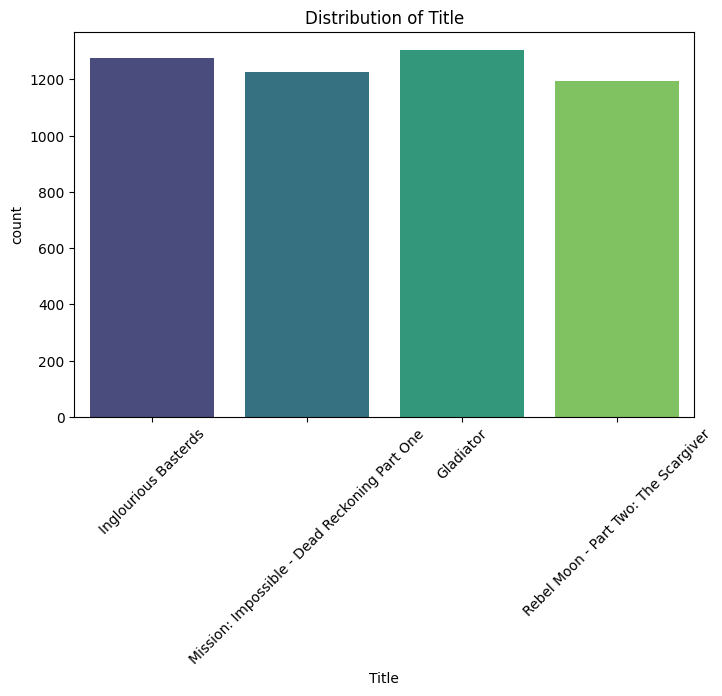

<ipython-input-3-d5cb5ae8ad52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


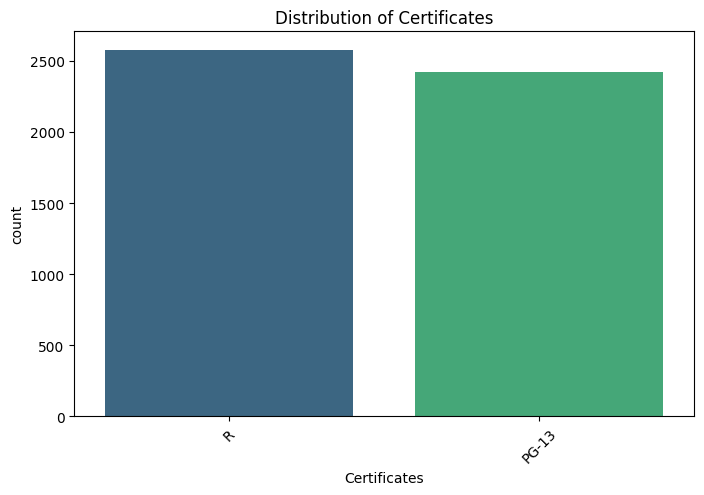

<ipython-input-3-d5cb5ae8ad52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


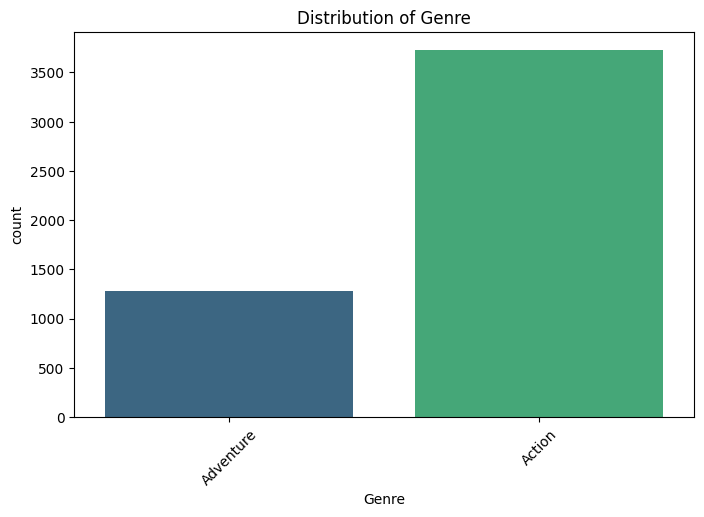

<ipython-input-3-d5cb5ae8ad52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


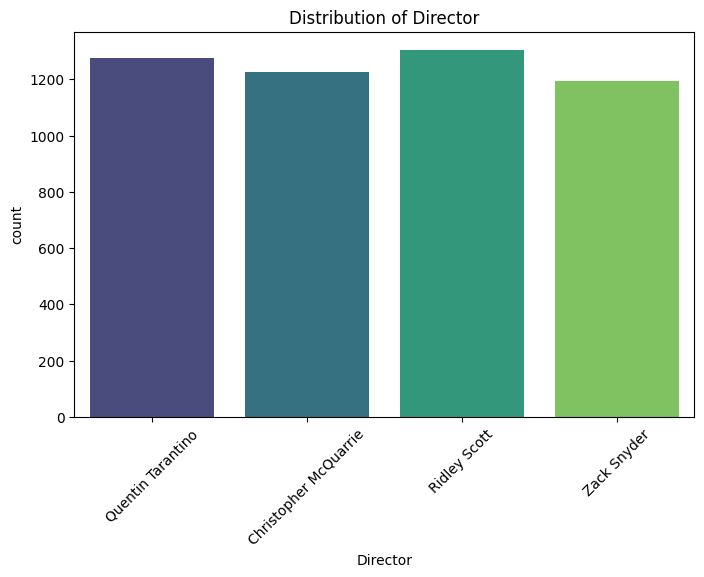

<ipython-input-3-d5cb5ae8ad52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


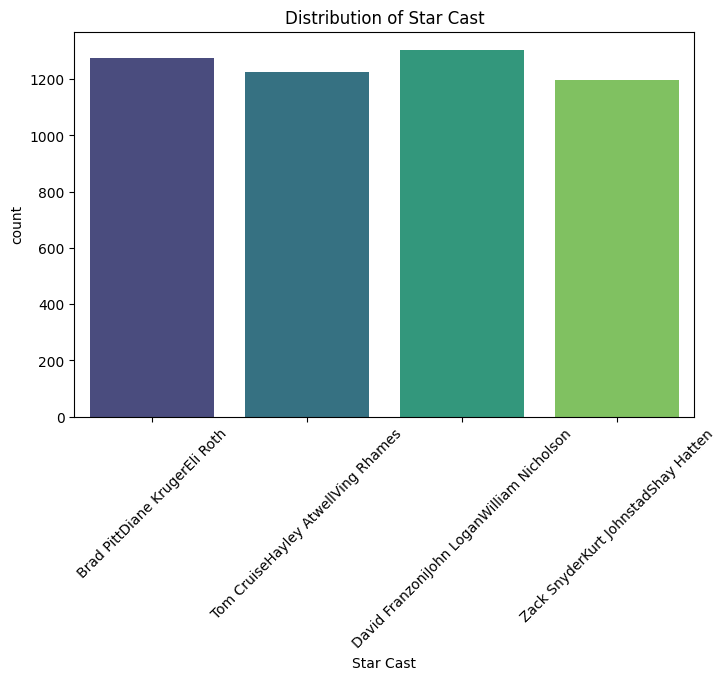

<ipython-input-3-d5cb5ae8ad52>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


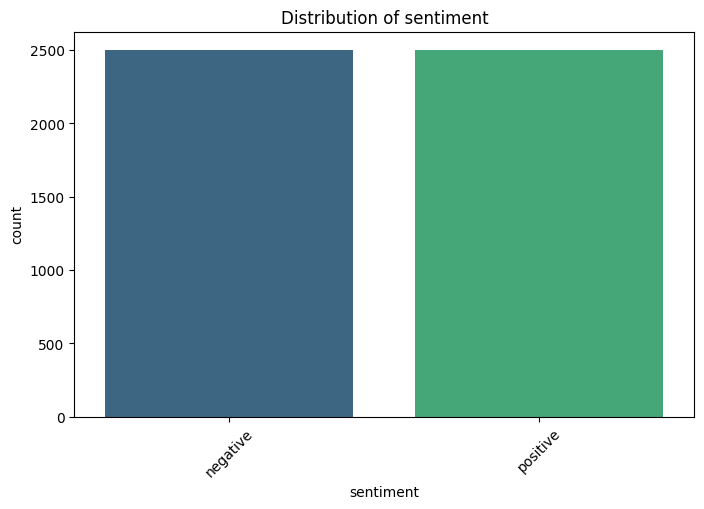


Sentiment distribution:
sentiment
negative    2500
positive    2500
Name: count, dtype: int64


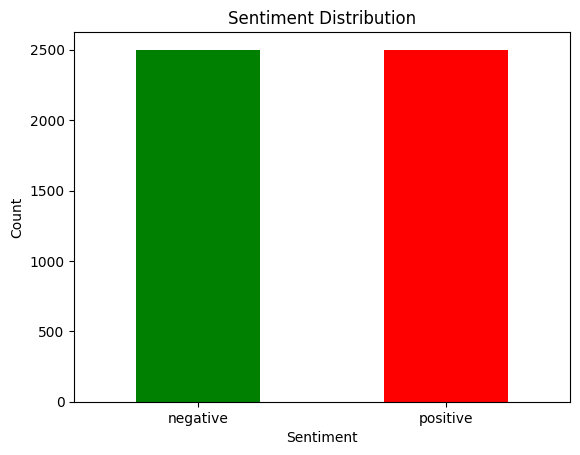

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/IMDB-MOVIE-REVIEW-BALANCED.csv')
#  inspect the non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object', 'category']).columns

# Check for missing values in non-numerical columns
print("Missing Values in Non-Numerical Columns:")
print(df[non_numerical_columns].isnull().sum())

# Frequency distribution for each non-numerical column
print("\nFrequency Distribution of Non-Numerical Columns:")
for column in non_numerical_columns:
    print(f"\n{column} Value Counts:")
    print(df[column].value_counts())

# Visualize the distribution of non-numerical columns (e.g., sentiment, genre, director)
for column in non_numerical_columns:
    if df[column].nunique() <= 20:  # To avoid overcrowded plots
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=column, palette="viridis")
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.show()

# 1. **Sentiment Distribution** (positive vs negative)
if 'sentiment' in df.columns:
    sentiment_counts = df['sentiment'].value_counts()
    print("\nSentiment distribution:")
    print(sentiment_counts)

    # Plot sentiment distribution
    sentiment_counts.plot(kind='bar', color=['green', 'red'])
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# 2. **Genre Distribution** (if available)
if 'genre' in df.columns:
    genre_counts = df['genre'].value_counts()
    print("\nGenre distribution:")
    print(genre_counts)

    # Plot genre distribution
    genre_counts.plot(kind='bar', color='purple')
    plt.title('Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 3. **Director Distribution** (if available)
if 'director' in df.columns:
    director_counts = df['director'].value_counts()
    print("\nDirector distribution:")
    print(director_counts.head(10))  # Show top 10 directors

    # Plot director distribution (Top 10 directors)
    director_counts.head(10).plot(kind='bar', color='blue')
    plt.title('Top 10 Directors Distribution')
    plt.xlabel('Director')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 4. **Star Cast Distribution** (if available)
if 'star_cast' in df.columns:
    star_cast_counts = df['star_cast'].value_counts()
    print("\nStar Cast distribution:")
    print(star_cast_counts.head(10))  # Show top 10 star casts

    # Plot star cast distribution (Top 10)
    star_cast_counts.head(10).plot(kind='bar', color='orange')
    plt.title('Top 10 Star Cast Distribution')
    plt.xlabel('Star Cast')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# **Word Frequency Analysis**

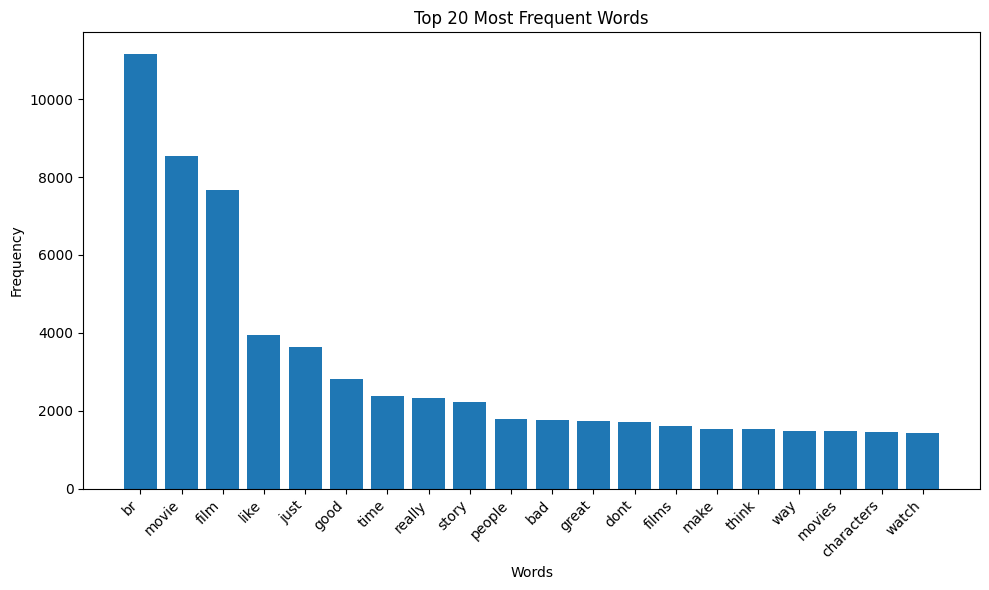

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

# Load the CSV file
df = pd.read_csv('IMDB-MOVIE-REVIEW-BALANCED.csv')

# Assuming your text column is named 'review' (adjust if needed)
text_data = df['review'].astype(str).str.lower()

# Preprocess the text: Remove punctuation and stopwords
def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

# Apply preprocessing
cleaned_text = text_data.apply(preprocess)

# Tokenize and count words
all_words = ' '.join(cleaned_text).split()
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the word frequency chart
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.tight_layout()
plt.show()


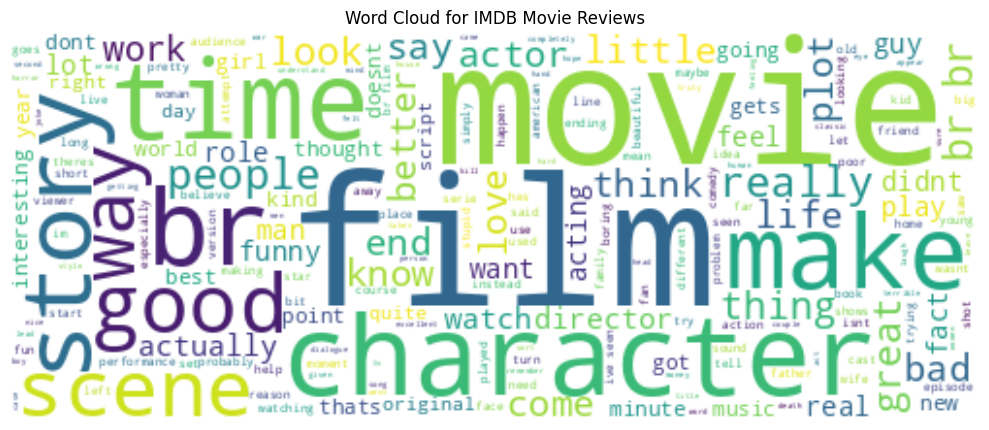

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

# Load the CSV file
df = pd.read_csv('IMDB-MOVIE-REVIEW-BALANCED.csv')

# Assuming your text column is named 'review' (adjust if needed)
text_data = df['review'].astype(str).str.lower()

# Preprocess the text: Remove punctuation and stopwords
def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    words = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

# Apply preprocessing
cleaned_text = text_data.apply(preprocess)

# Combine all the reviews into one string
all_reviews = ' '.join(cleaned_text)

# Generate the word cloud
wordcloud = WordCloud(width=500, height=200, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for IMDB Movie Reviews')
plt.tight_layout()
plt.show()


# **INFERENCE OF NON-CATEGORICAL DATA**
1. Review is on four movies
2. Equal distribution of sentiments
3. Genre, certificate, director Value counts
3. Top 10 directors and star casting

# **Correlation Analysis on Numerical Columns**


Missing Values in Numerical Columns:
Rating       0
Year         0
MetaScore    0
Duration     0
dtype: int64

Correlation Matrix:
             Rating      Year  MetaScore  Duration
Rating     1.000000 -0.742934   0.846785  0.889178
Year      -0.742934  1.000000  -0.293722 -0.394233
MetaScore  0.846785 -0.293722   1.000000  0.992671
Duration   0.889178 -0.394233   0.992671  1.000000


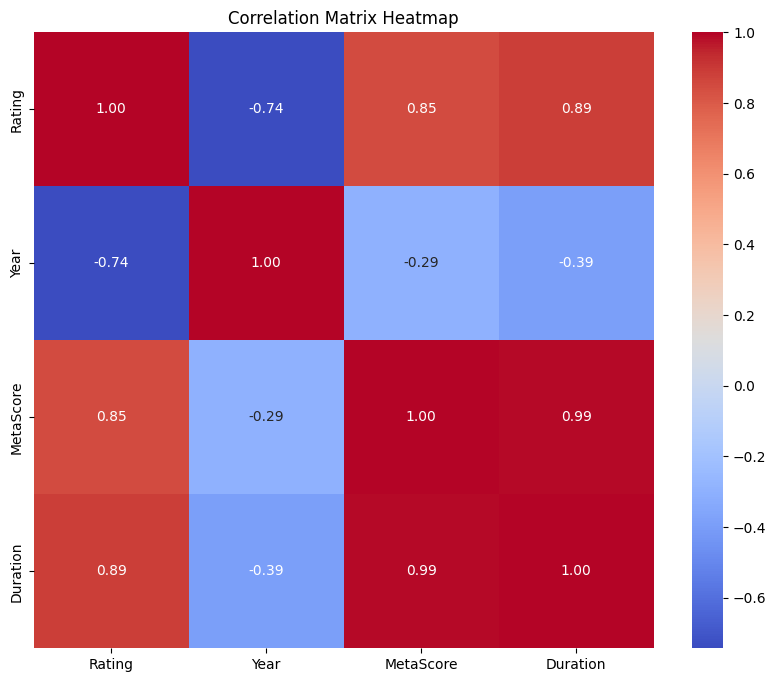

In [ ]:
import pandas as pd
df = pd.read_csv('/content/IMDB-MOVIE-REVIEW-BALANCED.csv')
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check for missing values in numerical columns
print("\nMissing Values in Numerical Columns:")
print(df[numerical_columns].isnull().sum())

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# **Correlation Inference**

Strong Positive Correlations:
Rating & MetaScore (0.85): Audience ratings align closely with critic scores.
Rating & Duration (0.89): Longer movies tend to receive higher ratings.
MetaScore & Duration (0.99): Critics favor longer movies.

Negative Correlations:
Year & Rating (-0.74): Older movies tend to have higher ratings.
Year & Duration (-0.39): Older movies are generally longer.
Year & MetaScore (-0.29): Critics slightly favor older movies.

Key Takeaway:
Movie length significantly impacts both ratings and scores.
Older movies show a strong preference in both audience and critic evaluations.

# **Corelation between Metascore and Rating is explored in detail**

First few rows of the dataset:
                                           Title  Rating  Year Certificates  \
0                           Inglourious Basterds     8.4  2009            R   
1  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
2  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
3  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
4  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   

       Genre               Director                           Star Cast  \
0  Adventure      Quentin Tarantino       Brad PittDiane KrugerEli Roth   
1     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
2     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
3     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
4     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   

   MetaScore  Duration                     

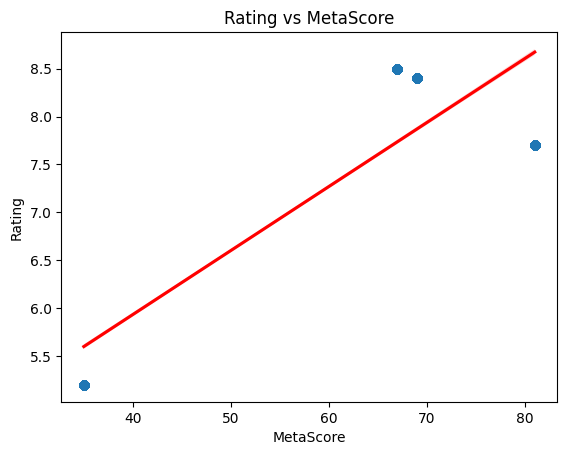

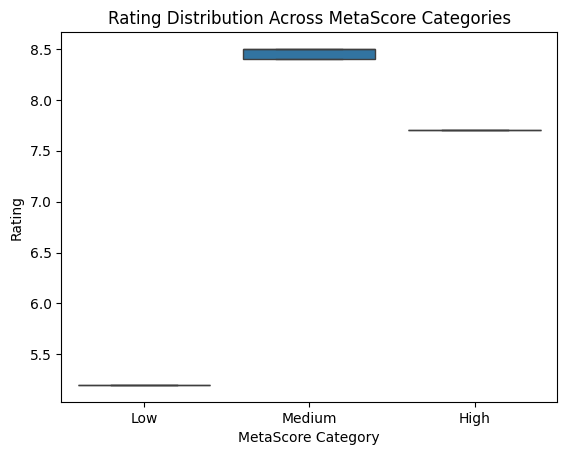


Correlation between Rating and MetaScore: 0.85


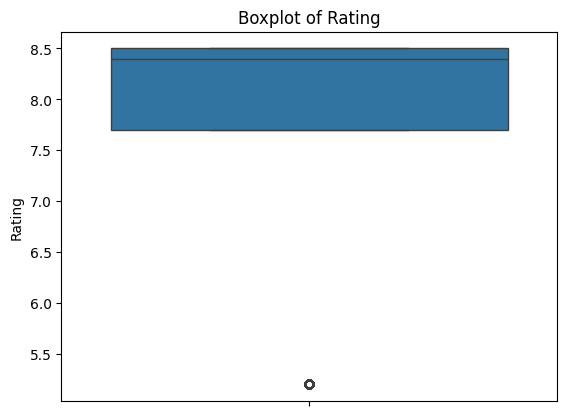

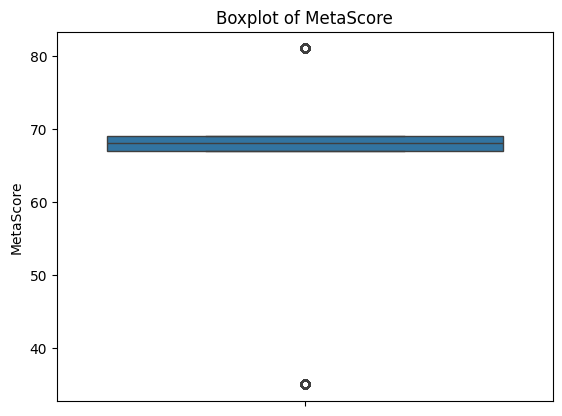


Number of records before removing outliers: 5000
Number of records after removing outliers: 2579

Average Rating by MetaScore Category:
MetaScore_Category
Low            NaN
Medium    8.450562
High           NaN
Name: Rating, dtype: float64


<ipython-input-1-5dad3005ef54>:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_no_outliers.groupby('MetaScore_Category')['Rating'].mean()


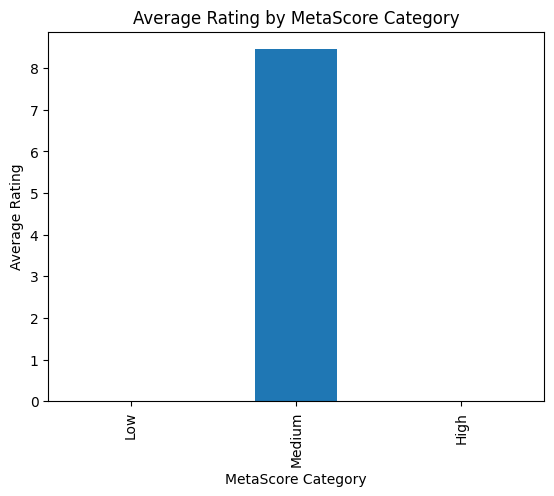

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/IMDB-MOVIE-REVIEW-BALANCED.csv')

# ---------------------------------
# 1. Purpose: Understand the data structure
# ---------------------------------
# Check the first few rows to get an overview of the data
print("First few rows of the dataset:")
print(df.head())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())
print(df.columns)

# ---------------------------------
# 2. Purpose: Visualize the relationship between Rating and MetaScore using a scatter plot
# ---------------------------------
# Scatter plot with regression line
sns.regplot(x='MetaScore', y='Rating', data=df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Rating vs MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('Rating')
plt.show()

# ---------------------------------
# 3. Purpose: Group MetaScore into categories and compare Rating distributions using a box plot
# ---------------------------------
# Create categories for MetaScore (Low: 0-40, Medium: 41-70, High: 71-100)
df['MetaScore_Category'] = pd.cut(df['MetaScore'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

# Box plot to show Rating distribution across MetaScore categories
sns.boxplot(x='MetaScore_Category', y='Rating', data=df)
plt.title('Rating Distribution Across MetaScore Categories')
plt.xlabel('MetaScore Category')
plt.ylabel('Rating')
plt.show()

# ---------------------------------
# 4. Purpose: Calculate the correlation between Rating and MetaScore
# ---------------------------------
# Calculate the Pearson correlation coefficient
correlation = df['Rating'].corr(df['MetaScore'])
print(f"\nCorrelation between Rating and MetaScore: {correlation:.2f}")

# ---------------------------------
# 5. Purpose: Detect and visualize outliers in Rating and MetaScore
# ---------------------------------
# Box plot for detecting outliers in Rating
sns.boxplot(df['Rating'])
plt.title('Boxplot of Rating')
plt.show()

# Box plot for detecting outliers in MetaScore
sns.boxplot(df['MetaScore'])
plt.title('Boxplot of MetaScore')
plt.show()

# ---------------------------------
# 6. Purpose: Handle outliers - Removing
# ---------------------------------
# Define limits for Rating and MetaScore based on the IQR
Q1_rating, Q3_rating = np.percentile(df['Rating'], [25, 75])
IQR_rating = Q3_rating - Q1_rating
lower_rating_limit = Q1_rating - 1.5 * IQR_rating
upper_rating_limit = Q3_rating + 1.5 * IQR_rating

Q1_meta, Q3_meta = np.percentile(df['MetaScore'], [25, 75])
IQR_meta = Q3_meta - Q1_meta
lower_meta_limit = Q1_meta - 1.5 * IQR_meta
upper_meta_limit = Q3_meta + 1.5 * IQR_meta

# Remove outliers
df_no_outliers = df[
    (df['Rating'] >= lower_rating_limit) & (df['Rating'] <= upper_rating_limit) &
    (df['MetaScore'] >= lower_meta_limit) & (df['MetaScore'] <= upper_meta_limit)
]
print("\nNumber of records before removing outliers:", len(df))
print("Number of records after removing outliers:", len(df_no_outliers))

# ---------------------------------
# 7. Purpose: Analyze the trend of average Rating across MetaScore categories
# ---------------------------------
# Group data by MetaScore_Category and calculate the average Rating
grouped = df_no_outliers.groupby('MetaScore_Category')['Rating'].mean()

# Display and visualize the grouped data
print("\nAverage Rating by MetaScore Category:")
print(grouped)

grouped.plot(kind='bar', title='Average Rating by MetaScore Category')
plt.xlabel('MetaScore Category')
plt.ylabel('Average Rating')
plt.show()




Report of Correlation

Scatter plot

Observation: There is a positive linear correlation between MetaScore and Rating. As MetaScore increases, Rating tends to increase.
Trend: The regression line indicates a moderate-to-strong positive relationship.
Outlier: A point around MetaScore 40 and Rating 5.5 deviates from the trend.

Box Plot

Correlation: Strong positive correlation (0.85) between Rating and MetaScore.
Boxplot: Ratings mostly range between 8.0 and 8.5, with one outlier (~5.5).
Conclusion: Strong relationship observed; the outlier should be reviewed for impact.

# **Check Dataset for Imbalancy**

Class distribution:
sentiment
negative    2500
positive    2500
Name: count, dtype: int64


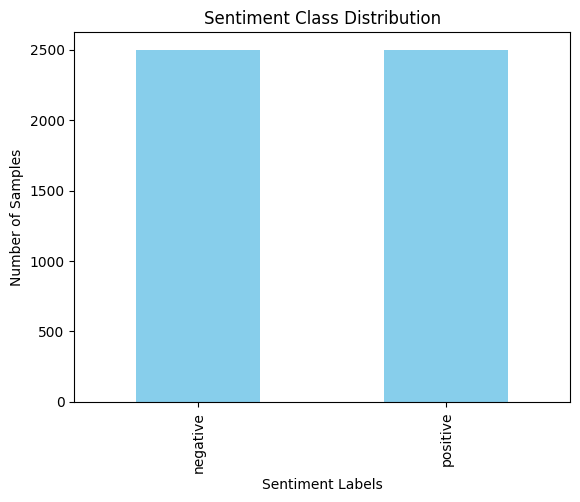

The dataset is balanced with an imbalance ratio of 1.00.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your dataset (replace 'your_dataset.csv' with your file)
df = pd.read_csv('/content/IMDB-MOVIE-REVIEW-BALANCED.csv')  # Replace with your dataset file
# Example dataset structure: {'text': ['sample1', 'sample2'], 'sentiment': ['positive', 'negative']}

# Step 1: Check the distribution of sentiment classes
class_counts = df['sentiment'].value_counts()

# Print class counts
print("Class distribution:")
print(class_counts)

# Step 2: Visualize the class distribution
class_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Samples')
plt.show()

# Step 3: Check if the dataset is imbalanced
# Calculate the imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()

# Define a threshold for imbalance (e.g., ratio > 2 indicates imbalance)
threshold = 2

if imbalance_ratio > threshold:
    print(f"The dataset is imbalanced with an imbalance ratio of {imbalance_ratio:.2f}.")
else:
    print(f"The dataset is balanced with an imbalance ratio of {imbalance_ratio:.2f}.")


# **Data Preprocessing on the Reviews for Sentiment Analysis**

Load the Dataset


Lowercasing

Remove Punctuation

Tokenization

Stopword Removal

Stemming/Lemmatization


In [ ]:
!pip install spacy
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sample sentence.")
print([token.text for token in doc])  # Output: ['This', 'is', 'a', 'sample', 'sentence', '.']


In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("IMDB-MOVIE-REVIEW.csv")  # Replace with the correct file path

# Step 2: Group by movie title and sample 10,000 records per title
df_sampled = df.groupby('Title').apply(lambda x: x.sample(n=10000, replace=False) if len(x) >= 10000 else x)

# Step 3: Reset index after grouping and sampling
df_sampled.reset_index(drop=True, inplace=True)

# Step 4: Save the processed data back to the same CSV file
df_sampled.to_csv("IMDB-MOVIE-REVIEW.csv", index=False)

# Step 5: Print the shape of the resulting DataFrame
print(f"Shape of the final dataset: {df_sampled.shape}")


<ipython-input-8-c9547cf6d271>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('Title').apply(lambda x: x.sample(n=10000, replace=False) if len(x) >= 10000 else x)


Shape of the final dataset: (20000, 11)


In [ ]:
# Step 1: Install and Load SpaCy
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 2: Load the Sampled Dataset
df = pd.read_csv("/content/IMDB-MOVIE-REVIEW-BALANCED.csv")  # This is the file with sampled records

# Step 3: Define Preprocessing Function Using SpaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())  # Convert to lowercase and process text

    # Tokenize, remove stopwords, punctuation, numbers, and lemmatize
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.like_num
    ]

    # Return the preprocessed text as a single string
    return " ".join(tokens)

# Step 4: Apply Preprocessing to the 'review' Column
df['processed_review'] = df['review'].apply(preprocess_text_spacy)

# Step 5: Save the Processed Data to a New File
df.to_csv("IMDB-MOVIE-REVIEW-PRE.CSV", index=False)

# Step 6: Print the Shape of the Processed Data
print(f"Shape of the processed dataset: {df.shape}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Shape of the processed dataset: (5000, 12)


# **Install and Check Spacy Working**

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Test spaCy with a sample sentence
test_sentence = "SpaCy is working fine now."
doc = nlp(test_sentence)

# Print tokenized words
for token in doc:
    print(token.text)


SpaCy
is
working
fine
now
.


In [ ]:
!pip install tqdm


In [ ]:
from tqdm import tqdm
tqdm.pandas()  # This enables the progress_apply method



In [ ]:
#Text Preprocessing using Spacy
import spacy
import pandas as pd

# Load spaCy model (disable unnecessary components for faster processing)
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "tagger"])

# Step 1: Load the Sampled Dataset
df = pd.read_csv("/content/IMDB-MOVIE-REVIEW-BALANCED.csv")  # Replace with the correct file path

# Step 2: Define Preprocessing Function Using SpaCy
def preprocess_text_spacy(text):
    # Process text with spaCy (convert to lowercase, remove stopwords, punctuation, and lemmatize)
    doc = nlp(text.lower())

    # Tokenize, remove stopwords, punctuation, numbers, and lemmatize
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.like_num
    ]

    # Return the preprocessed text as a single string
    return " ".join(tokens)

# Step 3: Use Batch Processing to Apply Preprocessing
df['processed_review'] = df['review'].progress_apply(preprocess_text_spacy)

# Step 4: Save the Processed Data to a New File
df.to_csv("IMDB-MOVIE-REVIEW-PRE.CSV", index=False)

# Step 5: Print the Shape of the Processed Data
print(f"Shape of the processed dataset: {df.shape}")


  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 5000/5000 [01:56<00:00, 42.88it/s]


Shape of the processed dataset: (5000, 12)


# ***Upsampling Demo ***

In [ ]:
#Upsampling Demo
import pandas as pd
from sklearn.utils import resample

# Step 1: Load the dataset
df = pd.read_csv("IMDB-MOVIE-REVIEW.csv")  #

# Step 2: Check the unique values in the 'sentiment' column to identify any inconsistencies
print("Unique values in sentiment column:", df['sentiment'].unique())

# Step 3: Standardize the sentiment labels (convert to lowercase)
df['sentiment'] = df['sentiment'].str.lower()  # Convert all labels to lowercase

# Step 4: Check the class distribution after standardizing labels
print("Class distribution after standardization:")
print(df['sentiment'].value_counts())

# Step 5: Check the first few rows of the dataframe to see actual values in 'sentiment' and 'review'
print("First few rows of the dataset:")
print(df[['sentiment', 'review']].head())

# Step 6: Separate majority and minority classes
df_majority = df[df.sentiment == 'negative']
df_minority = df[df.sentiment == 'positive']

# Step 7: Check if the minority class is empty
if len(df_minority) == 0:
    print("Minority class is empty, cannot perform resampling.")
    print("Class distribution of 'positive':", df['sentiment'].value_counts().get('positive', 0))
    # Handle this case if necessary, e.g., use a different approach or fix the data
else:
    # Step 8: Upsample the minority class to match the majority class size
    df_minority_upsampled = resample(df_minority,
                                     replace=True,  # sample with replacement
                                     n_samples=len(df_majority),  # match majority class size
                                     random_state=42)

    # Step 9: Combine the upsampled minority class with the majority class
    df_balanced = pd.concat([df_majority, df_minority_upsampled])

    # Step 10: Verify the balance of the dataset after resampling
    print("Class distribution after resampling:")
    print(df_balanced['sentiment'].value_counts())

    # Step 11: Save the balanced dataset to a new CSV (optional)
    df_balanced.to_csv("IMDB-MOVIE-REVIEW-BALANCED.csv", index=False)


Unique values in sentiment column: ['positive' 'negative']
Class distribution after standardization:
sentiment
positive    2500
negative    2500
Name: count, dtype: int64
First few rows of the dataset:
  sentiment                                             review
0  positive  I was lucky enough to see Zero Day last night....
1  negative  A bickering, American family, vacationing in t...
2  negative  I saw this film recently in a film festival. I...
3  positive  I have spent many years studying all the great...
4  positive  Based on a William Faulkner short story, Two S...
Class distribution after resampling:
sentiment
negative    2500
positive    2500
Name: count, dtype: int64


# **Feature Engineering and Feature Extraction** ⚓
Text processing uses feature extraction techniques to convert text into usable numerical forms for models(TF-IDF,BoW, word2Vec etc..) while traditional feature engineering (e.g., scaling or combining features) is not typically necessary for text data.

For word count we use TF-IDF


# **Machine Language : Naive Bayes**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the processed dataset
df = pd.read_csv("IMDB-MOVIE-REVIEW-PRE.CSV")  # Replace with the correct file path

# Step 2: Prepare the Data (Features and Labels)
X = df['processed_review']  # Features (processed reviews)
y = df['sentiment']         # Labels (sentiments - positive/negative)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Vectorize the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 5: Train the Naive Bayes model (MultinomialNB)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Step 6: Predict on the test set
y_pred = naive_bayes_model.predict(X_test_tfidf)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report on testing data:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8560

Classification Report on testing data:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.86       500
    positive       0.88      0.83      0.85       500

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [ ]:
#Checking the model with Random Review
# Example random reviews (unseen by the model during training or testing)
random_reviews = [
    "I absolutely loved this film! The plot was fantastic, and the acting was amazing.",
    "This movie was a waste of time. The plot was predictable and boring.",
    "What a fantastic thriller! The suspense kept me on the edge of my seat.",
    "Terrible. I would not recommend it to anyone. It was so dull and unoriginal."
]

# Step 1: Preprocess the random reviews (same as training data)
processed_random_reviews = [preprocess_text_spacy(review) for review in random_reviews]

# Step 2: Vectorize the random reviews using the same TF-IDF vectorizer
random_reviews_tfidf = tfidf_vectorizer.transform(processed_random_reviews)

# Step 3: Predict sentiment using the trained Naive Bayes model
random_predictions = naive_bayes_model.predict(random_reviews_tfidf)

# Step 4: Display the predictions
for review, prediction in zip(random_reviews, random_predictions):
    sentiment = "Positive" if prediction == "positive" else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


Review: I absolutely loved this film! The plot was fantastic, and the acting was amazing.
Predicted Sentiment: Positive

Review: This movie was a waste of time. The plot was predictable and boring.
Predicted Sentiment: Negative

Review: What a fantastic thriller! The suspense kept me on the edge of my seat.
Predicted Sentiment: Positive

Review: Terrible. I would not recommend it to anyone. It was so dull and unoriginal.
Predicted Sentiment: Negative



/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Unique values in sentiment column: ['positive' 'negative']
Class distribution after standardization:
sentiment
positive    20000
negative    20000
Name: count, dtype: int64
First few rows of the dataset:
  sentiment                                             review
0  positive  This is such a fantastic movie, a Western abou...
1  positive  Ironically for a play unavailable on film or v...
2  positive  In 1989, Aardman Animations introduced the two...
3  positive  Three horror stories based on members of a tra...
4  positive  I saw this movie tonight in a preview showing ...
Class distribution after resampling:
sentiment
negative    20000
positive    20000
Name: count, dtype: int64


# **DL MODEL : RECURRENT NEURAL NETWORK**

In [ ]:
!pip install spacy
!pip install gensim
!pip install keras
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Print TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

# Simple test model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(5,), activation='relu')
])
print("Keras model created successfully!")


TensorFlow version: 2.17.1
Keras version: 3.5.0
Keras model created successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#RNN MODEL FOR SENTIMENT ANALYSIS
# Import necessary libraries
import numpy as np
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout


from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load spaCy for text preprocessing
nlp = spacy.load("en_core_web_sm")

# Load the IMDB dataset
# Ensure your file path is correct
data_path = "/content/IMDB-MOVIE-REVIEW-PRE .CSV"  # Replace with your dataset path
data = pd.read_csv(data_path)

# Display dataset structure
print("Dataset sample:\n", data.head())
print("\nDataset columns:", data.columns)

# Dataset preprocessing
# Assuming the dataset has two columns: 'review' and 'sentiment'
# Sentiment is binary: 0 (negative), 1 (positive)
reviews = data['review']
sentiments = data['sentiment']

# Function to preprocess text using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert text to lowercase and tokenize
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to all reviews
print("\nPreprocessing text data...")
preprocessed_reviews = reviews.apply(preprocess_text)

# Tokenize the preprocessed reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)

# Pad the sequences to ensure consistent input length
max_len = 100  # Maximum review length (adjustable)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Prepare word index
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding token
print(f"\nVocabulary size: {vocab_size}")

# Load pre-trained Word2Vec embeddings (Google News)
# Download the file from: https://code.google.com/archive/p/word2vec/
word2vec_path = "GoogleNews-vectors-negative300.bin"  # Replace with your Word2Vec path
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Prepare the embedding matrix
embedding_dim = 300  # Pre-trained Word2Vec vector size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
    else:
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))  # Random vector for OOV words

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Build the RNN model
print("\nBuilding the RNN model...")
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # Use pre-trained embeddings without training
model.add(SimpleRNN(128, return_sequences=False))  # RNN layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
print("\nTraining the RNN model...")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32, verbose=1)

# Evaluate the model
print("\nEvaluating the RNN model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
print("\nGenerating predictions...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Dataset sample:
                                            Title  Rating  Year Certificates  \
0                           Inglourious Basterds     8.4  2009            R   
1  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
2  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
3  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
4  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   

       Genre               Director                           Star Cast  \
0  Adventure      Quentin Tarantino       Brad PittDiane KrugerEli Roth   
1     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
2     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
3     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
4     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   

   MetaScore  Duration                                   

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load spaCy for text preprocessing
nlp = spacy.load("en_core_web_sm")

# Load the IMDB dataset
# Ensure your file path is correct
data_path = "/content/IMDB-MOVIE-REVIEW-PRE.CSV"  # Replace with your dataset path
data = pd.read_csv(data_path)

# Display dataset structure
print("Dataset sample:\n", data.head())
print("\nDataset columns:", data.columns)

# Dataset preprocessing
# Assuming the dataset has two columns: 'review' and 'sentiment'
# Sentiment is binary: 0 (negative), 1 (positive)
reviews = data['review']
sentiments = data['sentiment']

# Function to preprocess text using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert text to lowercase and tokenize
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to all reviews
print("\nPreprocessing text data...")
preprocessed_reviews = reviews.apply(preprocess_text)

# Tokenize the preprocessed reviews
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000 most frequent words
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)

# Pad the sequences to ensure consistent input length
max_len = 100  # Maximum review length (adjustable)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Prepare word index
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, 10000)  # Ensure vocabulary size is limited
print(f"\nVocabulary size: {vocab_size}")

# Load pre-trained GloVe embeddings (smaller version, e.g., glove.6B.50d)
# GloVe file download link: https://nlp.stanford.edu/data/glove.6B.zip (50-dimensional vectors)
glove_path = "glove.6B.50d.txt"  # Replace with your GloVe path
embedding_dim = 50  # Use 50-dimensional GloVe vectors for faster processing

# Prepare the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Load the GloVe embeddings into the matrix
with open(glove_path, "r", encoding="utf-8") as f:
    glove_embeddings = {line.split()[0]: np.array(line.split()[1:], dtype='float32') for line in f}

for word, i in word_index.items():
    if i >= vocab_size:
        break
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))  # Random vector for OOV words

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Build the RNN model
print("\nBuilding the RNN model...")
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # Use pre-trained embeddings without training
model.add(SimpleRNN(128, return_sequences=False))  # RNN layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
print("\nTraining the RNN model...")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64, verbose=1)

# Evaluate the model
print("\nEvaluating the RNN model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
print("\nGenerating predictions...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Dataset sample:
                                            Title  Rating  Year Certificates  \
0                           Inglourious Basterds     8.4  2009            R   
1  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
2  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
3  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
4  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   

       Genre               Director                           Star Cast  \
0  Adventure      Quentin Tarantino       Brad PittDiane KrugerEli Roth   
1     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
2     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
3     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   
4     Action  Christopher McQuarrie  Tom CruiseHayley AtwellVing Rhames   

   MetaScore  Duration                                   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)


Training the RNN model...
Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node data_1 defined at (most recent call last):
<stack traces unavailable>
Detected at node data_1 defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_4033[] on XLA_GPU_JIT: _Arg (No registered '_Arg' OpKernel for XLA_GPU_JIT devices compatible with node {{node data_1}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_STRING, _output_shapes=[[64,1]], _user_specified_name="data", index=1){{node data_1}}
The op is created at: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-5-be4306653eb9>", line 99, in <cell line: 99>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value
File "/usr/local/lib/python3.10/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>
	tf2xla conversion failed while converting __inference_one_step_on_data_4033[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_4084]

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Disable GPU if necessary (optional)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Load IMDB Dataset
max_features = 10000  # Vocabulary size
maxlen = 200  # Max length of each sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure equal length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Debug: Check input shapes and data types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

# Convert data types if needed
X_train = X_train.astype('int32')
X_test = X_test.astype('int32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Define the LSTM Model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=maxlen),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print Model Summary
model.summary()

# Train the Model
print("\nTraining the RNN model...")
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=3,
    batch_size=64,
    verbose=1
)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (25000, 200)
X_test shape: (25000, 200)
y_train shape: (25000,)
y_test shape: (25000,)
X_train dtype: int32
y_train dtype: int64


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training the RNN model...
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6949 - loss: 0.5517 - val_accuracy: 0.8384 - val_loss: 0.3914
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8981 - loss: 0.2736 - val_accuracy: 0.8338 - val_loss: 0.3575
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9209 - loss: 0.2184 - val_accuracy: 0.8690 - val_loss: 0.3171
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8625 - loss: 0.3347

Test Loss: 0.3317
Test Accuracy: 0.8643


Dataset sample:
        Title  Rating  Year Certificates   Genre      Director  \
0  Gladiator     8.5  2000            R  Action  Ridley Scott   
1  Gladiator     8.5  2000            R  Action  Ridley Scott   
2  Gladiator     8.5  2000            R  Action  Ridley Scott   
3  Gladiator     8.5  2000            R  Action  Ridley Scott   
4  Gladiator     8.5  2000            R  Action  Ridley Scott   

                                   Star Cast  MetaScore  Duration  \
0  David FranzoniJohn LoganWilliam Nicholson         67       155   
1  David FranzoniJohn LoganWilliam Nicholson         67       155   
2  David FranzoniJohn LoganWilliam Nicholson         67       155   
3  David FranzoniJohn LoganWilliam Nicholson         67       155   
4  David FranzoniJohn LoganWilliam Nicholson         67       155   

                                              review sentiment  
0  This is such a fantastic movie, a Western abou...  positive  
1  Ironically for a play unavailable on film or

KeyboardInterrupt: 

In [ ]:
# Load the IMDB dataset
data_path = "IMDB-MOVIE-REVIEW.csv"  # Replace with your dataset path
data = pd.read_csv(data_path)

# Display basic info about the dataset
print("Dataset sample:\n", data.head())
print("\nDataset columns:", data.columns)

# Separate the data into positive (1) and negative (0) reviews
positive_reviews = data[data['sentiment'] == 'positive'].sample(n=2500, random_state=42)
negative_reviews = data[data['sentiment'] == 'negative'].sample(n=2500, random_state=42)

# Concatenate the positive and negative reviews
filtered_data = pd.concat([positive_reviews, negative_reviews])

# Shuffle the dataset to mix the positive and negative reviews randomly
filtered_data = filtered_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the filtered dataset to a new CSV file
filtered_data.to_csv("IMDB-MOVIE-REVIEW-5000.csv", index=False)

# Confirm the number of records and sample the new dataset
print(f"Filtered dataset saved with {len(filtered_data)} records.")
print(filtered_data.head())


Dataset sample:
        Title  Rating  Year Certificates   Genre      Director  \
0  Gladiator     8.5  2000            R  Action  Ridley Scott   
1  Gladiator     8.5  2000            R  Action  Ridley Scott   
2  Gladiator     8.5  2000            R  Action  Ridley Scott   
3  Gladiator     8.5  2000            R  Action  Ridley Scott   
4  Gladiator     8.5  2000            R  Action  Ridley Scott   

                                   Star Cast  MetaScore  Duration  \
0  David FranzoniJohn LoganWilliam Nicholson         67       155   
1  David FranzoniJohn LoganWilliam Nicholson         67       155   
2  David FranzoniJohn LoganWilliam Nicholson         67       155   
3  David FranzoniJohn LoganWilliam Nicholson         67       155   
4  David FranzoniJohn LoganWilliam Nicholson         67       155   

                                              review sentiment  
0  This is such a fantastic movie, a Western abou...  positive  
1  Ironically for a play unavailable on film or

In [ ]:
#not using pre-trained word embedding it learns from scratch
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load a small sample of data for testing
data_path = "IMDB-MOVIE-REVIEW-5000.csv"
data = pd.read_csv(data_path)

# Convert sentiment labels to binary values: 0 for negative, 1 for positive
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

# Simple preprocessing function
def preprocess_text_simple(text):
    tokens = [word for word in text.split() if word.isalpha()]  # Remove punctuation and numbers
    return " ".join(tokens)

# Apply preprocessing to a smaller subset of data (500 reviews)
reviews = data['review']
print("\nPreprocessing text data...")
preprocessed_reviews = reviews.apply(preprocess_text_simple)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000 most frequent words
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)

# Pad sequences to ensure consistent input length
max_len = 100  # Maximum review length
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Prepare the sentiment labels for the same subset (500 reviews)
sentiments = data['sentiment']  # Same number of sentiments for the 500 reviews

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Build the RNN model
print("\nBuilding the RNN model...")
model = Sequential()
model.add(Embedding(input_dim=10000,  # Vocabulary size (top 10,000 words)
                    output_dim=100,  # Word embedding dimension (GloVe 100d)
                    input_length=max_len))  # Maximum sequence length
model.add(SimpleRNN(128, return_sequences=False))  # RNN layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification (Positive/Negative)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
print("\nTraining the RNN model...")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64, verbose=1)

# Evaluate the model on the test set
print("\nEvaluating the RNN model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
print("\nGenerating predictions...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))



Preprocessing text data...

Building the RNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training the RNN model...
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.4943 - loss: 0.7138 - val_accuracy: 0.5450 - val_loss: 0.6916
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6241 - loss: 0.6531 - val_accuracy: 0.5013 - val_loss: 0.7256
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7453 - loss: 0.5435 - val_accuracy: 0.4988 - val_loss: 0.7342

Evaluating the RNN model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4887 - loss: 0.7188
Test Loss: 0.7133
Test Accuracy: 0.5090

Generating predictions...
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.59      0.56       524
    Positive       0.48      0.42      0.45       476

    accuracy                           0.51      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.51      0.51      0.51      1000



In [ ]:
#glove RNN
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the GloVe 6B 50d embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Path to the GloVe 6B 50d file (update the path if needed)
glove_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_path)
print(f"Loaded {len(glove_embeddings)} word vectors from GloVe.")

# Load a small sample of data for testing
data_path = "IMDB-MOVIE-REVIEW-5000.csv"
data = pd.read_csv(data_path)

# Convert sentiment labels to binary values: 0 for negative, 1 for positive
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

# Simple preprocessing function
def preprocess_text_simple(text):
    tokens = [word for word in text.split() if word.isalpha()]  # Remove punctuation and numbers
    return " ".join(tokens)

# Apply preprocessing to a smaller subset of data (500 reviews)
reviews = data['review']
print("\nPreprocessing text data...")
preprocessed_reviews = reviews.apply(preprocess_text_simple)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000 most frequent words
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)

# Pad sequences to ensure consistent input length
max_len = 100  # Maximum review length
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Prepare the sentiment labels for the same subset (500 reviews)
sentiments = data['sentiment']  # Same number of sentiments for the 500 reviews

# Prepare the embedding matrix from GloVe
vocab_size = min(len(tokenizer.word_index) + 1, 10000)  # Vocabulary size (top 10,000 words)
embedding_dim = 50  # GloVe 50d embedding
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        break
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Build the RNN model with pre-trained GloVe embeddings
print("\nBuilding the RNN model...")
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # Use pre-trained embeddings without training
model.add(SimpleRNN(128, return_sequences=False))  # RNN layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification (Positive/Negative)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
print("\nTraining the RNN model...")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64, verbose=1)

# Evaluate the model on the test set
print("\nEvaluating the RNN model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
print("\nGenerating predictions...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Loaded 400000 word vectors from GloVe.

Preprocessing text data...

Building the RNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)


Training the RNN model...
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.4970 - loss: 0.7797 - val_accuracy: 0.5362 - val_loss: 0.6980
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5430 - loss: 0.7137 - val_accuracy: 0.5263 - val_loss: 0.7073
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5561 - loss: 0.7039 - val_accuracy: 0.5337 - val_loss: 0.7013

Evaluating the RNN model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5383 - loss: 0.7040
Test Loss: 0.7071
Test Accuracy: 0.5200

Generating predictions...
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.43      0.48       524
    Positive       0.50      0.62      0.55       476

    accuracy                           0.52      1000
   macro avg       0.53      0.52      0.52      1000
weighted avg       0.53      0.52      0.52      1000



In [ ]:
#wod2vec RNN
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load a small sample of data for testing
data_path = "IMDB-MOVIE-REVIEW-5000.csv"
data = pd.read_csv(data_path)

# Convert sentiment labels to binary values: 0 for negative, 1 for positive
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

# Simple preprocessing function
def preprocess_text_simple(text):
    tokens = [word for word in text.split() if word.isalpha()]  # Remove punctuation and numbers
    return " ".join(tokens)

# Apply preprocessing to the dataset
reviews = data['review']
print("\nPreprocessing text data...")
preprocessed_reviews = reviews.apply(preprocess_text_simple)

# Tokenize text data for Word2Vec
tokenized_reviews = [review.split() for review in preprocessed_reviews]

# Train a Word2Vec model with 50 dimensions
print("\nTraining Word2Vec model...")
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=50, window=5, min_count=1, workers=4)

# Get the word vectors and vocabulary size
word_vectors = word2vec_model.wv
vocab_size = len(word_vectors) + 1  # Add 1 for padding token
embedding_dim = 50  # Dimension of the Word2Vec embeddings

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
word_index = {word: idx for idx, word in enumerate(word_vectors.index_to_key, start=1)}

for word, i in word_index.items():
    embedding_matrix[i] = word_vectors[word]

# Tokenize and pad sequences for the RNN model
print("\nTokenizing and padding sequences...")
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.word_index = word_index  # Use Word2Vec vocabulary
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)
max_len = 100  # Maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Prepare the sentiment labels
sentiments = data['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Build the RNN model
print("\nBuilding the RNN model...")
model = Sequential()
model.add(Embedding(input_dim=vocab_size,  # Vocabulary size
                    output_dim=embedding_dim,  # Embedding dimension
                    weights=[embedding_matrix],  # Pre-trained Word2Vec embeddings
                    input_length=max_len,  # Sequence length
                    trainable=False))  # Freeze embeddings
model.add(SimpleRNN(128, return_sequences=False))  # RNN layer with 128 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification (Positive/Negative)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
print("\nTraining the RNN model...")
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64, verbose=1)

# Evaluate the model on the test set
print("\nEvaluating the RNN model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
print("\nGenerating predictions...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))



Preprocessing text data...

Training Word2Vec model...

Tokenizing and padding sequences...

Building the RNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       1,855,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,855,350 (7.08 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,855,350 (7.08 MB)


Training the RNN model...
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.5221 - loss: 0.7744 - val_accuracy: 0.5138 - val_loss: 0.7084
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5352 - loss: 0.7300 - val_accuracy: 0.5150 - val_loss: 0.7090
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5842 - loss: 0.6923 - val_accuracy: 0.5038 - val_loss: 0.7147

Evaluating the RNN model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5101 - loss: 0.7049
Test Loss: 0.7050
Test Accuracy: 0.5280

Generating predictions...
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.52      0.54       524
    Positive       0.50      0.54      0.52       476

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000



# **INFERENCE USING GLOVE, WORD2VEC AND SIMPLE TOKENISER IN RNN**

**No Pre-trained Embeddings** offer better results for positive sentiment but require more computational resources for training embeddings.

**GloVe Embeddings**  are more effective for recognizing negative sentiment and are quick to integrate but may underperform for positive sentiment.

**Word2Vec Embeddings** strike a balance between the two, providing decent performance across both classes with consistent metrics, making it a more generalized choice.

# **Deep Learning : Long Short Term Memory**

In [ ]:
#Glove LSTM glove.6b.50d.txt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Updated to LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the GloVe 6B 50d embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Path to the GloVe 6B 50d file (update the path if needed)
glove_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_path)
print(f"Loaded {len(glove_embeddings)} word vectors from GloVe.")

# Load a small sample of data for testing
data_path = "IMDB-MOVIE-REVIEW-5000.csv"
data = pd.read_csv(data_path)

# Convert sentiment labels to binary values: 0 for negative, 1 for positive
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

# Simple preprocessing function
def preprocess_text_simple(text):
    tokens = [word for word in text.split() if word.isalpha()]  # Remove punctuation and numbers
    return " ".join(tokens)

# Apply preprocessing to a smaller subset of data (500 reviews)
reviews = data['review']
print("\nPreprocessing text data...")
preprocessed_reviews = reviews.apply(preprocess_text_simple)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000 most frequent words
tokenizer.fit_on_texts(preprocessed_reviews)
sequences = tokenizer.texts_to_sequences(preprocessed_reviews)

# Pad sequences to ensure consistent input length
max_len = 100  # Maximum review length
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Prepare the sentiment labels for the same subset (500 reviews)
sentiments = data['sentiment']  # Same number of sentiments for the 500 reviews

# Prepare the embedding matrix from GloVe
vocab_size = min(len(tokenizer.word_index) + 1, 10000)  # Vocabulary size (top 10,000 words)
embedding_dim = 50  # GloVe 50d embedding
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        break
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Build the LSTM model with pre-trained GloVe embeddings
print("\nBuilding the LSTM model...")  # Updated to LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # Use pre-trained embeddings without training
# Changed SimpleRNN to LSTM here
model.add(LSTM(128, return_sequences=False))  # LSTM layer with 128 units (handles long-term dependencies)
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification (Positive/Negative)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

# Train the model
print("\nTraining the LSTM model...")  # Changed from RNN to LSTM
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64, verbose=1)

# Evaluate the model on the test set
print("\nEvaluating the LSTM model...")  # Changed from RNN to LSTM
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
print("\nGenerating predictions...")
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Loaded 400000 word vectors from GloVe.

Preprocessing text data...

Building the LSTM model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)


Training the LSTM model...
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5446 - loss: 0.6978 - val_accuracy: 0.5325 - val_loss: 0.6938
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5761 - loss: 0.6825 - val_accuracy: 0.5587 - val_loss: 0.6792
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6079 - loss: 0.6595 - val_accuracy: 0.6438 - val_loss: 0.6505

Evaluating the LSTM model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6500 - loss: 0.6358
Test Loss: 0.6483
Test Accuracy: 0.6240

Generating predictions...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.61      0.63       524
    Positive       0.60      0.64      0.62       476

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000



**LSTM outperforms RNN in every metric, proving it to be a better choice for tasks involving sequential data like sentiment analysis.**

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


**TRANSFER LEARNING - PRE TRAINED MODELS**
1. BERT(Encoder Based Transformer Model)
2. GPT(Decoder Based Trasformer Model)

In [ ]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
dataset = load_dataset("imdb")

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split the dataset into train and test
train_dataset = tokenized_datasets["train"]
test_dataset = tokenized_datasets["test"]

# Define the accuracy metric
def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=1)
    return {"accuracy": accuracy_score(labels, preds)}

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Output directory
    evaluation_strategy="epoch",  # Evaluate after every epoch
    num_train_epochs=1,  # Train for one epoch
    per_device_train_batch_size=8,  # Batch size for training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    logging_dir="./logs",  # Logging directory
    logging_steps=10,  # Log every 10 steps
    report_to="none",  # Disable W&B logging
    device=device,  # Ensure correct device is used (CPU/GPU)
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'device'

In [ ]:
import pandas as pd
from datasets import load_dataset

# Load the full IMDB dataset with 50,000 records
dataset = load_dataset("imdb")

# Convert the train and test sets to DataFrame
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# Save full train and test datasets as CSV files
train_df.to_csv("IMDB-MOVIE_REVIEW-50000_train.csv", index=False)
test_df.to_csv("IMDB-MOVIE_REVIEW-50000_test.csv", index=False)

# Select the first 500 records from the train and test datasets
train_df_500 = train_df.head(500)
test_df_500 = test_df.head(500)

# Save the first 500 records as new CSV files
train_df_500.to_csv("IMDB-MOVIE_REVIEW-500_train.csv", index=False)
test_df_500.to_csv("IMDB-MOVIE_REVIEW-500_test.csv", index=False)

print("CSV files created for first 500 records.")


CSV files created for first 500 records.


In [ ]:
import pandas as pd

# Load the train and test data
train_df_500 = pd.read_csv("IMDB-MOVIE_REVIEW-500_train.csv")
test_df_500 = pd.read_csv("IMDB-MOVIE_REVIEW-500_test.csv")

# Combine the train and test data into one DataFrame
combined_df = pd.concat([train_df_500, test_df_500], ignore_index=True)

# Save the combined DataFrame into a new CSV file
combined_df.to_csv("IMDB-500.csv", index=False)

print("IMDB-500.csv file created successfully!")


IMDB-500.csv file created successfully!


In [ ]:
import os
import pandas as pd
import torch
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Disable W&B logging by setting WANDB_DISABLED environment variable
os.environ["WANDB_DISABLED"] = "true"

# Load the CSV file
df = pd.read_csv('IMDB-500.csv')

# Make sure the dataframe has columns 'text' and 'label'
# 'text' column contains movie reviews, 'label' column contains sentiment (0 or 1)
df['label'] = df['label'].astype(int)

# Convert DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

# Apply tokenizer to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split dataset into train and test (80% train, 20% test)
train_dataset, test_dataset = tokenized_datasets.train_test_split(test_size=0.2).values()

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",          # Output directory
    evaluation_strategy="epoch",     # Evaluate after every epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    num_train_epochs=1,              # Only 1 epoch for quick testing
    weight_decay=0.01,               # Weight decay for regularization
    push_to_hub=False,               # No need to push to hub
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,                # Log every 10 steps
)

# Trainer instance
trainer = Trainer(
    model=model,                      # The model to train
    args=training_args,               # Training arguments
    train_dataset=train_dataset,      # Training dataset
    eval_dataset=test_dataset,        # Evaluation dataset
    tokenizer=tokenizer,              # Tokenizer
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Print evaluation results
print(results)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-3a69b7c28f4e>:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wand

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

In [ ]:
!pip install datasets pandas torch transformers scikit-learn


In [ ]:
#BERT MODEL
import os
import pandas as pd
import torch
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Disable W&B logging by setting WANDB_DISABLED environment variable
os.environ["WANDB_DISABLED"] = "true"

# Load the CSV file
df = pd.read_csv('IMDB-500.csv')

# Make sure the dataframe has columns 'text' and 'label'
# 'text' column contains movie reviews, 'label' column contains sentiment (0 or 1)
df['label'] = df['label'].astype(int)

# Convert DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

# Apply tokenizer to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split dataset into train and test (80% train, 20% test)
train_dataset, test_dataset = tokenized_datasets.train_test_split(test_size=0.2).values()

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",          # Output directory
    evaluation_strategy="epoch",     # Evaluate after every epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    num_train_epochs=1,              # Only 1 epoch for quick testing
    weight_decay=0.01,               # Weight decay for regularization
    push_to_hub=False,               # No need to push to hub
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,                # Log every 10 steps
)

# Trainer instance
trainer = Trainer(
    model=model,                      # The model to train
    args=training_args,               # Training arguments
    train_dataset=train_dataset,      # Training dataset
    eval_dataset=test_dataset,        # Evaluation dataset
    tokenizer=tokenizer,              # Tokenizer
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Print evaluation results
print(results)


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-10-35ab150c3a84>:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.001800,0.001502


{'eval_loss': 0.0015024831518530846, 'eval_runtime': 83.8327, 'eval_samples_per_second': 2.386, 'eval_steps_per_second': 0.298, 'epoch': 1.0}


Using device: cpu


KeyError: 'Sentiment'

In [ ]:
import pandas as pd

# Load the original dataset
input_file = "/content/IMDB-MOVIE-REVIEW-5000.csv"  # Update the file path if necessary
output_file = "IMDB-500.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Check the distribution of sentiments
print("Original dataset sentiment distribution:")
print(df["sentiment"].value_counts())

# Ensure the 'Sentiment' column contains valid values
if "sentiment" not in df.columns:
    raise KeyError("The 'Sentiment' column is missing in the dataset.")

# Sampling 250 positive and 250 negative reviews
try:
    positive_reviews = df[df["sentiment"].str.lower() == "positive"].sample(250, random_state=42)
    negative_reviews = df[df["sentiment"].str.lower() == "negative"].sample(250, random_state=42)
except ValueError as e:
    print("Error during sampling. Ensure the dataset contains enough positive and negative reviews.")
    print(e)
    exit()

# Combine and shuffle the balanced dataset
balanced_df = pd.concat([positive_reviews, negative_reviews]).sample(frac=1, random_state=42)

# Check the new distribution
print("Balanced dataset sentiment distribution:")
print(balanced_df["sentiment"].value_counts())

# Save the balanced dataset to a new CSV file
balanced_df.to_csv(output_file, index=False)
print(f"Balanced dataset saved to {output_file}")


Original dataset sentiment distribution:
sentiment
positive    2500
negative    2500
Name: count, dtype: int64
Balanced dataset sentiment distribution:
sentiment
negative    250
positive    250
Name: count, dtype: int64
Balanced dataset saved to IMDB-500.csv


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
#GPT 2
import os
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Disable W&B logging
os.environ["WANDB_DISABLED"] = "true"

# Load the IMDB-MOVIE_REVIEW-50000 dataset
df = pd.read_csv("/content/IMDB-500.csv")

# Create a balanced dataset
positive_reviews = df[df["sentiment"] == "positive"].sample(250, random_state=42)
negative_reviews = df[df["sentiment"] == "negative"].sample(250, random_state=42)
balanced_df = pd.concat([positive_reviews, negative_reviews]).sample(frac=1, random_state=42)

# Map Sentiment to numerical labels
label_mapping = {"positive": 1, "negative": 0}
balanced_df["sentiment"] = balanced_df["sentiment"].map(label_mapping)
# Check column names
print(balanced_df.columns)

# Clean column names by stripping spaces
balanced_df.columns = balanced_df.columns.str.strip()

# Inspect the first few rows to ensure data structure
print(balanced_df.head())

# Split into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    balanced_df["review"].tolist(), balanced_df["sentiment"].tolist(), test_size=0.2, random_state=42
)

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=2)

# Add a padding token to the tokenizer and model
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id

# Tokenize the datasets
def tokenize_function(texts, labels):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    ), {"labels": torch.tensor(labels)}

# Convert datasets into Hugging Face Dataset format
train_encodings, train_labels = tokenize_function(train_texts, train_labels)
test_encodings, test_labels = tokenize_function(test_texts, test_labels)

# Convert tokenized data into Dataset objects
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": train_labels["labels"],
})
test_dataset = Dataset.from_dict({
    "input_ids": test_encodings["input_ids"],
    "attention_mask": test_encodings["attention_mask"],
    "labels": test_labels["labels"],
})

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Output directory
    evaluation_strategy="epoch",  # Evaluate after each epoch
    num_train_epochs=1,  # Number of training epochs
    per_device_train_batch_size=8,  # Batch size for training
    per_device_eval_batch_size=8,  # Batch size for evaluation
    logging_dir="./logs",  # Directory for storing logs
    logging_steps=10,
    save_strategy="no",  # Disable model saving
    report_to="none",  # Disable reporting to W&B
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train and evaluate the model
trainer.train()
eval_results = trainer.evaluate()

print("Evaluation Results:", eval_results)



Index(['Title', 'Rating', 'Year', 'Certificates', 'Genre', 'Director',
       'Star Cast', 'MetaScore', 'Duration', 'review', 'sentiment'],
      dtype='object')
                                             Title  Rating  Year Certificates  \
482  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
147                                      Gladiator     8.5  2000            R   
180  Mission: Impossible - Dead Reckoning Part One     7.7  2023        PG-13   
305           Rebel Moon - Part Two: The Scargiver     5.2  2024        PG-13   
150           Rebel Moon - Part Two: The Scargiver     5.2  2024        PG-13   

      Genre               Director                                  Star Cast  \
482  Action  Christopher McQuarrie         Tom CruiseHayley AtwellVing Rhames   
147  Action           Ridley Scott  David FranzoniJohn LoganWilliam Nicholson   
180  Action  Christopher McQuarrie         Tom CruiseHayley AtwellVing Rhames   
305  Action            Zack

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.011200,1.046328


Evaluation Results: {'eval_loss': 1.046327829360962, 'eval_runtime': 43.8915, 'eval_samples_per_second': 2.278, 'eval_steps_per_second': 0.296, 'epoch': 1.0}


In [ ]:
#MERGING USING BPE byte pair encodeing used in GPT
from collections import Counter, defaultdict

def build_vocab(corpus):
    vocab = Counter()
    for word in corpus:
        # Add space between characters and append special end token
        tokens = " ".join(word) + " </w>"
        vocab[tokens] += 1
    return vocab

def get_stats(vocab):
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, vocab):
    new_vocab = {}
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        new_vocab[new_word] = vocab[word]
    return new_vocab

# Example corpus
corpus = ["low", "lower", "lowest"]

# Initialize vocabulary
vocab = build_vocab(corpus)

# Perform BPE merges
num_merges = 10
for _ in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best_pair = max(pairs, key=pairs.get)
    vocab = merge_vocab(best_pair, vocab)

# Display the final vocabulary
print(vocab)


{'low</w>': 1, 'lower</w>': 1, 'lowest</w>': 1}
